In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
(X_train,y_train) , (X_test,y_test) = datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

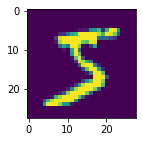

In [3]:
plt.figure(figsize = (2,2))
plt.imshow(X_train[0])

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [13]:
cnn = keras.Sequential([
    layers.Conv2D(filters = 3,kernel_size = (3,3), activation = 'relu',input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    #layers.Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'),
    #layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(150,activation='ReLU'),
    layers.Dense(10,activation='sigmoid')
    
])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=10)
cnn.evaluate(X_test,y_test) 

Epoch 1/10
1875/1875 [==============================] - 30s 6ms/step - loss: 0.2524 - accuracy: 0.9260
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1084 - accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0779 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0610 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0505 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0404 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0338 - accuracy: 0.9889
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0280 - accuracy: 0.9907
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0239 - accuracy: 0.9921
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss

[0.06793595850467682, 0.9821000099182129]

In [22]:
a = cnn.predict(X_test)

In [25]:
np.argmax(a[0])

7

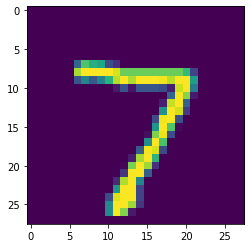

In [16]:
plt.imshow(X_test[0])

In [29]:
y_pred = [np.argmax(i) for i in a]

In [30]:
cm = tf.math.confusion_matrix(labels=y_test,predictions =y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    2,    0,    0,    1,    0,    3,    1,    0,    0],
       [   0, 1131,    3,    0,    0,    0,    0,    0,    1,    0],
       [   6,    5, 1007,    6,    1,    0,    1,    3,    3,    0],
       [   1,    0,    2,  991,    0,    6,    0,    4,    3,    3],
       [   0,    1,    1,    1,  966,    0,    3,    3,    1,    6],
       [   2,    0,    0,    4,    1,  879,    2,    0,    2,    2],
       [   2,    3,    0,    1,    2,    6,  943,    0,    1,    0],
       [   1,    9,    6,    3,    2,    0,    1,  994,    1,   11],
       [   2,    0,    3,    1,    4,    9,    2,    1,  946,    6],
       [   0,    4,    0,    1,    6,    4,    0,    2,    1,  991]])>

<AxesSubplot:>

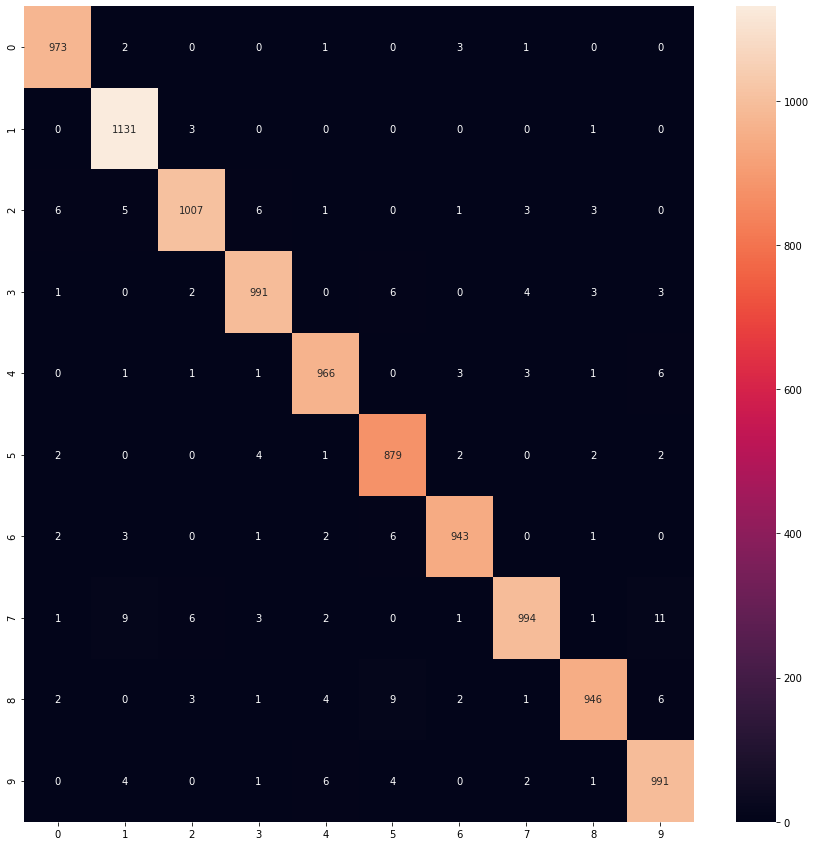

In [32]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,fmt='d')

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

